In [1]:
from field_of_view import FieldOfView
from clusters import ClusterParam, Cluster

import numpy as np
from matplotlib import pyplot as plt

In [48]:
nm_per_pixel = 21.34
time_per_frame = 0.1
Tau_D_GluA1 = 150.32
Tau_D_GluA2 = 97
background_threshold = 200
homer_path = '../Examples/A1_aHomer_corrected.csv'
life_act_path = '../Examples/A1_Composite.tif'
deepd3_path = 'DeepD3_32F.h5'
deepd3_pred_tresh = 0.2
points = [['GluA1', r'../Examples/A1_GluA1_corrected.csv', 'white', time_per_frame, Tau_D_GluA1],
          ['GluA2', r'../Examples/A1_GluA2_corrected.csv', 'cyan', time_per_frame, Tau_D_GluA2]]
Params = [ClusterParam(35, 10, 500, 50 , 'GluA2')]


In [49]:
FOV_A = FieldOfView(homer_centers=homer_path, 
                    life_act=life_act_path, 
                    nm_per_pixel=nm_per_pixel,
                    points=points, 
                    Params=Params, 
                    threshold=background_threshold,
                    deepd3_model_path=deepd3_path,
                    deepd3_pred_thresh=deepd3_pred_tresh,
                    to_plot=False)

Loading Life Act...
Setting up Thresholding...
1/1 [==============================] - 0s 324ms/step
Found model '2D_versatile_fluo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.
Loading Homer Centers...
Loading GluA1...
Loading GluA2...
Assigning Points to Spines...


clusters.py (223): Mean of empty slice.
_methods.py (184): invalid value encountered in divide


Finding Clusters for: GluA2(eps=35, min_samples=10, max_dark_time=500, min_localizations=50)...
Found 1454 Clusters
Filtered 72 Spines, Finding 37 Good Spines


1454


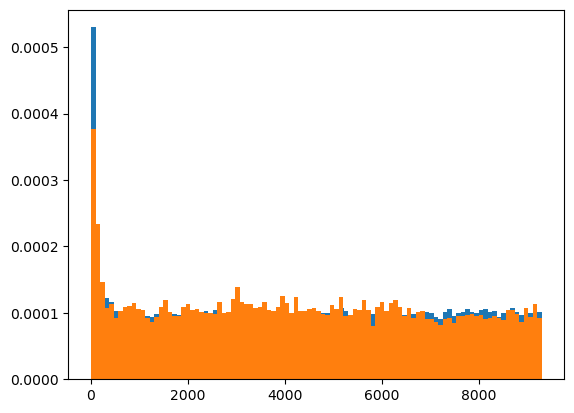

In [50]:
cluster_frames = []
print(len(FOV_A.clustering_results[Params[0]]))
for cluster in FOV_A.clustering_results[Params[0]]:
    cluster_frames.extend(cluster.frames.frames)
plt.figure()
plt.hist(FOV_A.Points[1].frames.frames, bins=100, density=True)
plt.hist(cluster_frames, bins=100, density=True)
plt.show()

Num Clusters = 1


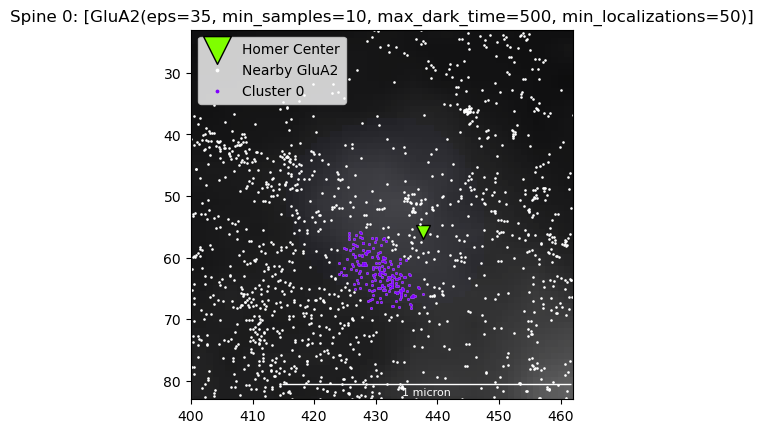

Num Clusters = 3


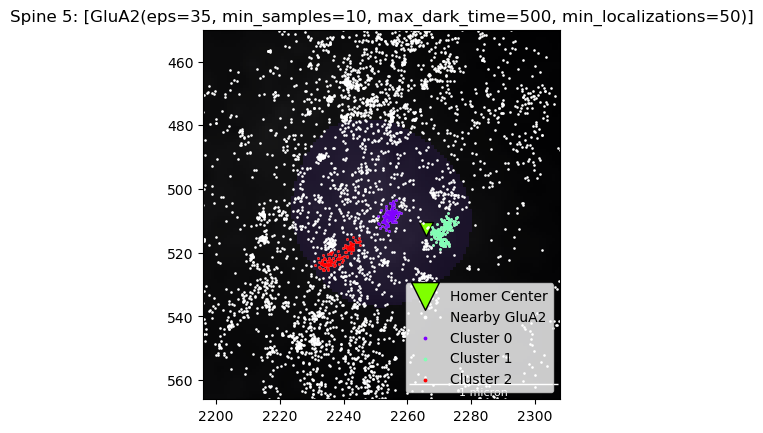

Num Clusters = 3


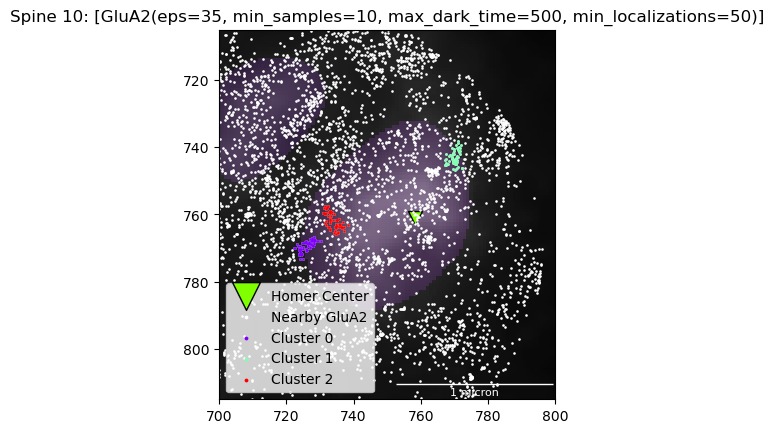

In [23]:
spine_idxs = [0, 5, 10]
for n in spine_idxs:
    spine = FOV_A.Spines[n]
    print(f"Num Clusters = {len(spine.clusters[Params[0]])}")
    plt.figure()
    spine.plot(Params=[Params[0]], life_act=FOV_A.life_act, Points=[spine.clusters[Params[0]][0].nearby_points], viewscale=2)
    plt.imshow(FOV_A.spinemap, alpha=0.3, cmap='magma')
    plt.legend(markerscale=2)
    plt.show()

<Figure size 640x480 with 0 Axes>

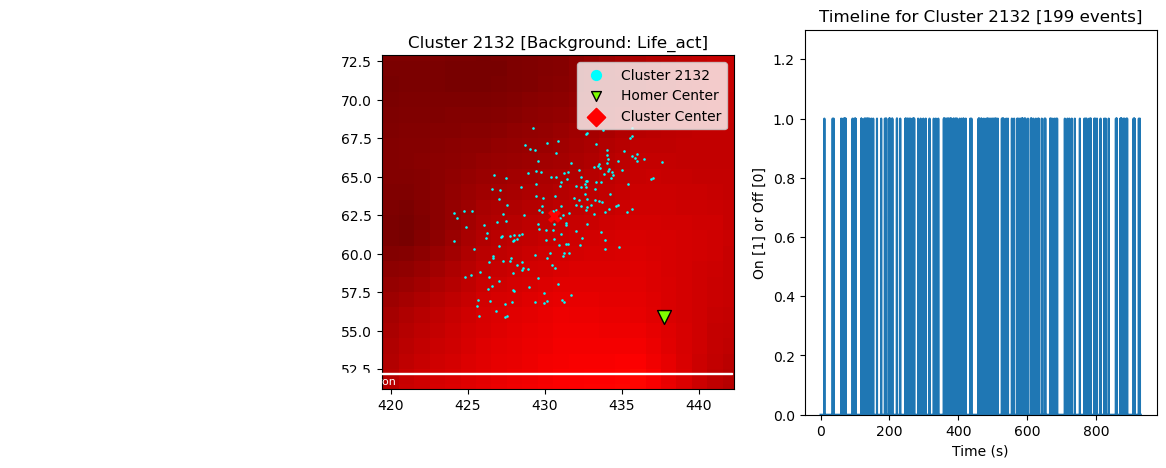

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

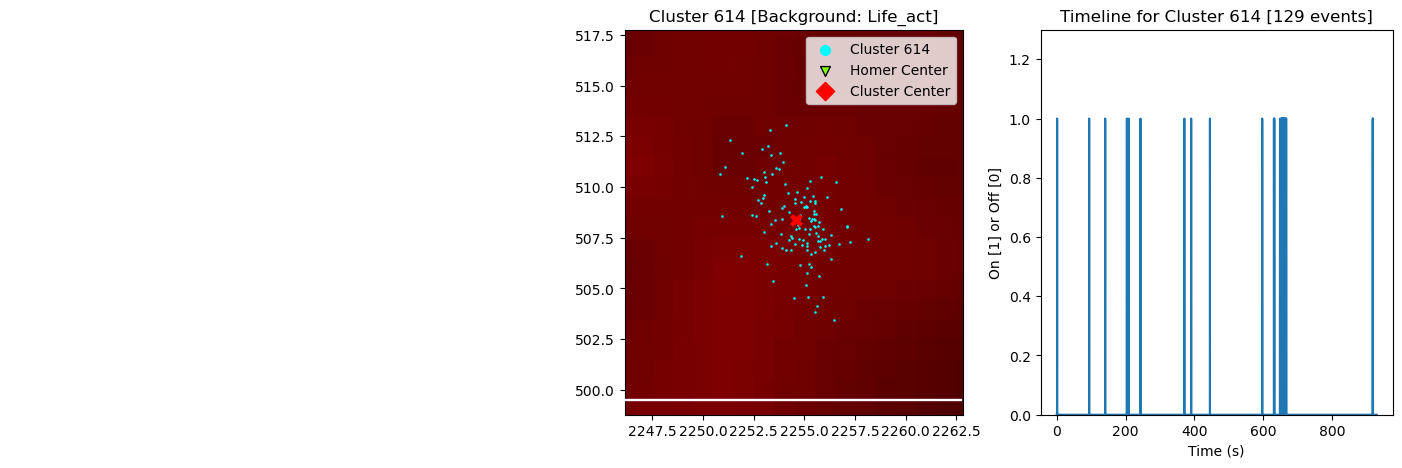

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

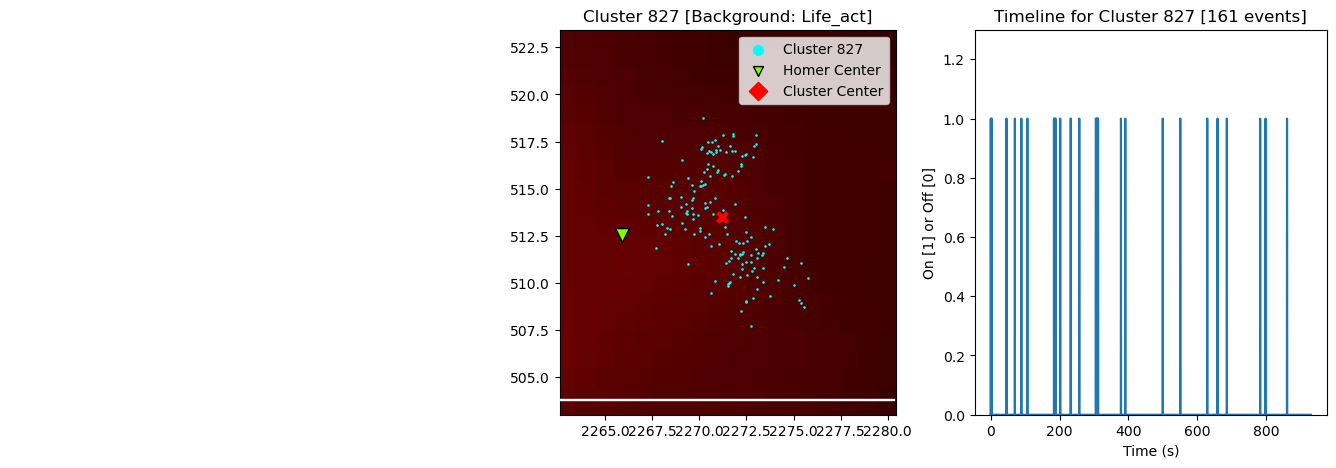

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

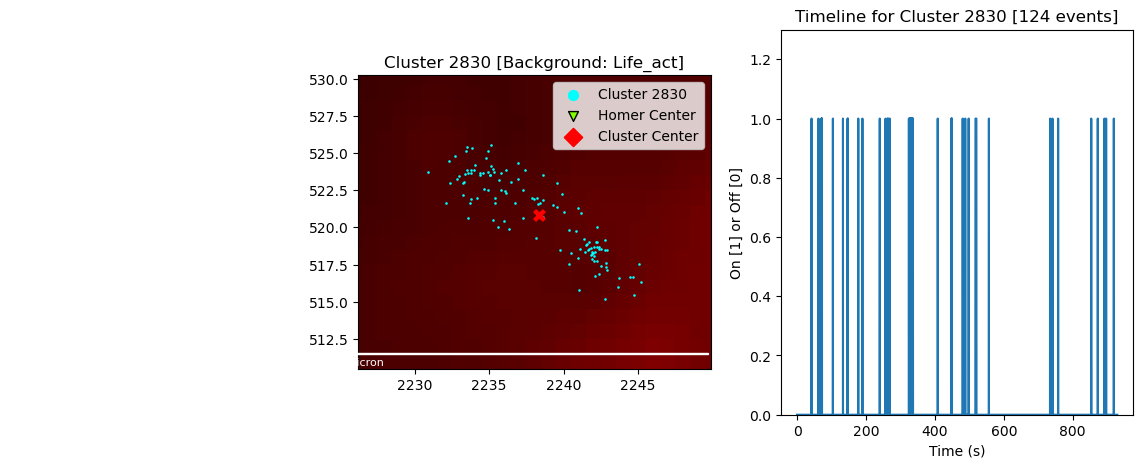

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

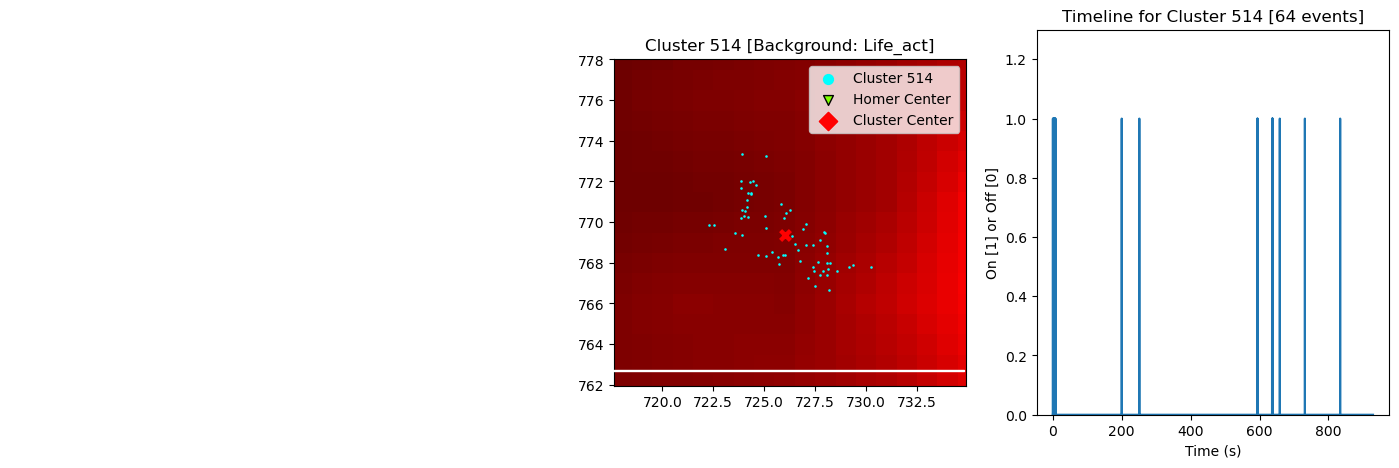

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

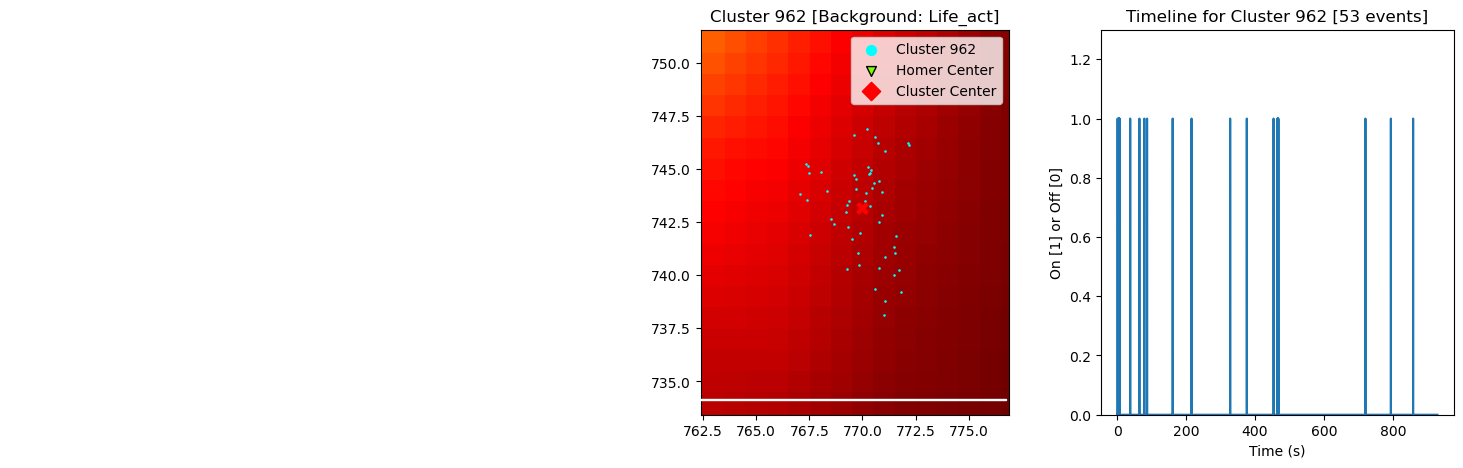

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

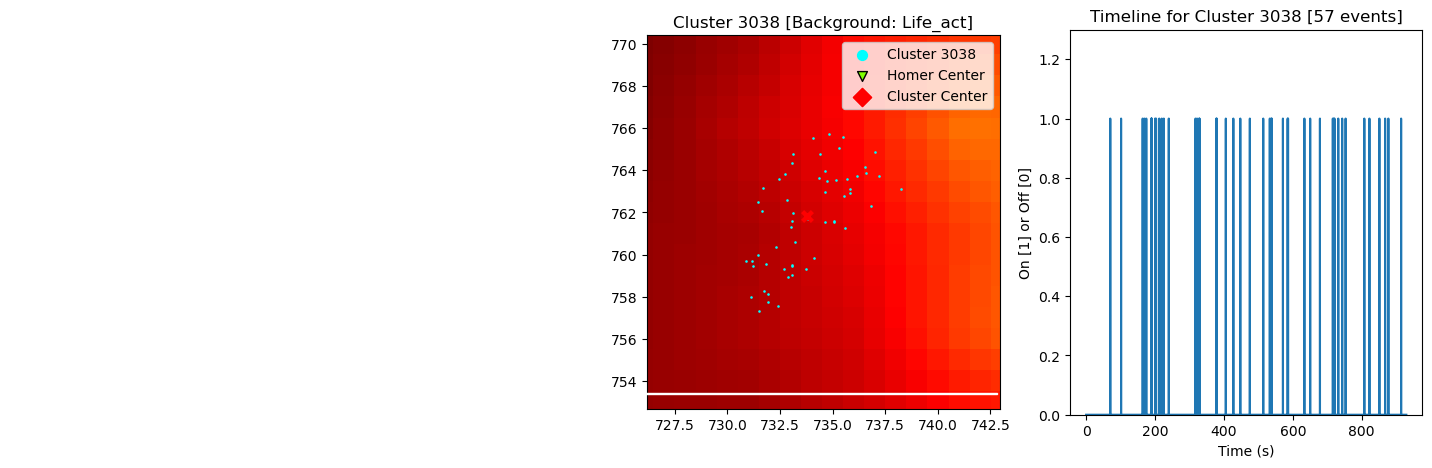

<Figure size 640x480 with 0 Axes>

In [24]:
for n in spine_idxs:
    spine = FOV_A.Spines[n]
    for cluster in spine.clusters[Params[0]]:
        plt.figure()
        cluster.plot()
        plt.tight_layout()
        plt.show()

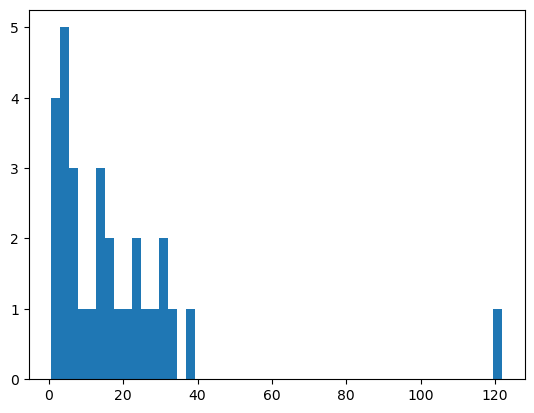

30


In [42]:
spine_clusters = [FOV_A.Spines[i].points['GluA1'] for i in range(len(FOV_A.Spines))]
if len(spine_clusters) != 0:
    Tau_D = spine_clusters[0].Tau_D
    average_dark_times = [cluster.average_dark_time for cluster in spine_clusters]
    cluster_sizes = [Tau_D/dark_time for dark_time in average_dark_times if dark_time != -1 and dark_time != 0]
plt.figure()
plt.hist(cluster_sizes, bins=50)
plt.show()
print(len(cluster_sizes))


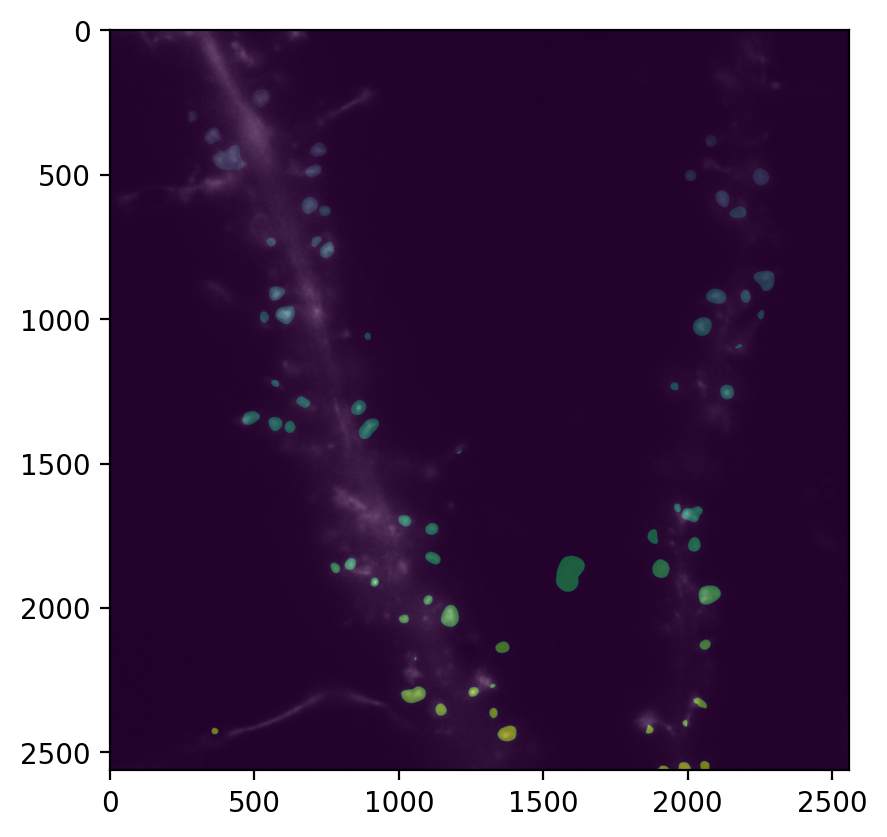

In [51]:
plt.figure(dpi=200)
plt.imshow(FOV_A.life_act, cmap='gray')
plt.imshow(FOV_A.spinemap, cmap='viridis', alpha=0.5)
plt.show()

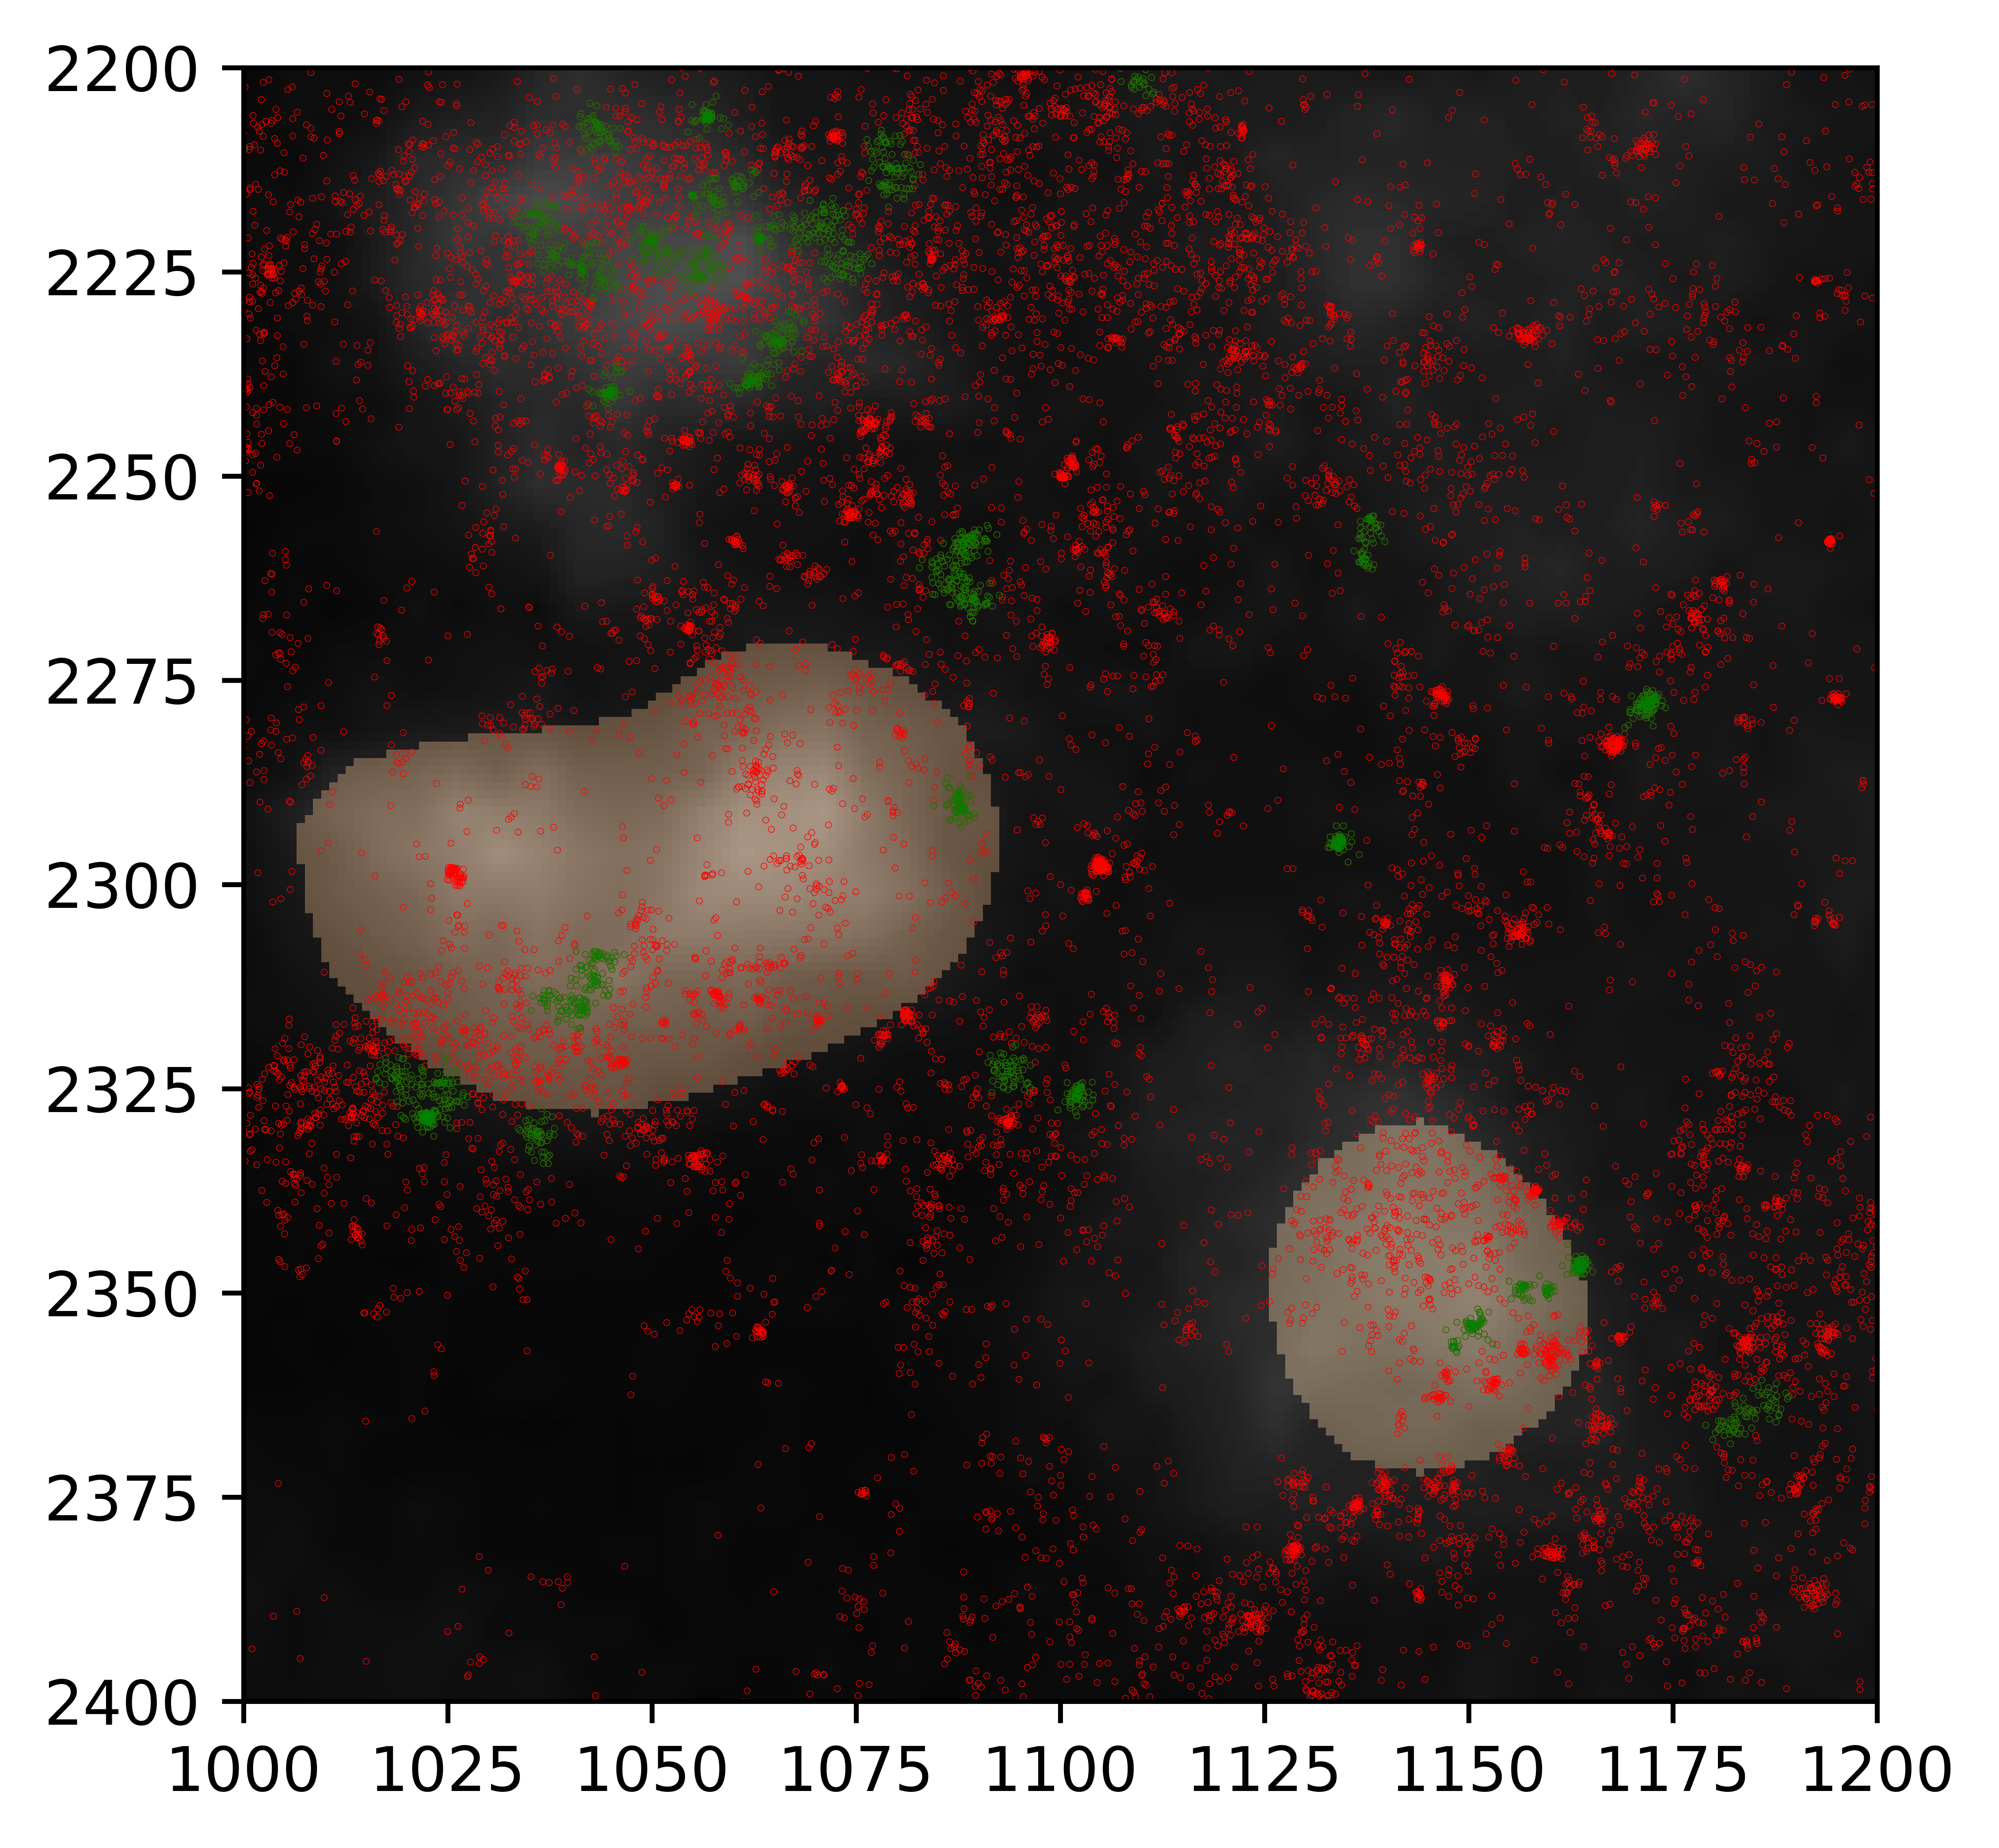

In [10]:
plt.figure(dpi=1000)
plt.imshow(FOV_A.life_act, cmap='gray')
FOV_A.Points[1].add_to_plot(s=0.01, color='red')
for cluster in FOV_A.clustering_results[Params[0]]:
    cluster.add_to_plot(s=0.01, color='green')
# for cluster in FOV_A.clustering_results[Params[1]]:
#     cluster.add_to_plot(s=0.01, color='blue')
# for cluster in FOV_A.clustering_results[Params[2]]:
#     cluster.add_to_plot(s=0.01, color='purple')
plt.imshow(FOV_A.spinemap, alpha=0.3, cmap='magma')
plt.ylim(2400, 2200)
plt.xlim(1000, 1200)
plt.show()

In [10]:
FOV_A.write_clusters_to_csv(filename="Cluster.csv", Params=Params[0], 
                            max_dark_time=5000, use_all_homers=False)


Cluster.csv created successfully!


In [25]:
len(FOV_A.Spines[0].clusters[Params[0]][0].points)

98

In [27]:
def moving_average(x, y, window_size):
    """
    Calculate the moving average of the y-values, using a given window size.
    """
    # Sort x and y by x-values
    sorted_indices = np.argsort(x)
    x_sorted = x[sorted_indices]
    y_sorted = y[sorted_indices]

    # Compute moving averages
    moving_averages = []
    moving_averages_x = []

    # Use a deque (double-ended queue) to store the values in the current window
    from collections import deque
    window = deque(maxlen=window_size)  # Only holds `window_size` number of elements

    # Use the index of the sorted x-values to iterate and calculate the moving average
    for i in range(len(x_sorted)):
        # Append the next y-value to the window
        window.append(y_sorted[i])

        # Calculate the mean of the current window
        window_mean = np.mean(window)

        # Store the moving average and corresponding x-value
        moving_averages.append(window_mean)
        moving_averages_x.append(x_sorted[i])

    return moving_averages_x, moving_averages

In [28]:
max_dark_time = 5000
param = Params[0]

sizes = FOV_A.get_all_cluster_sizes(param, max_dark_time)
# print(sizes)
print(len(sizes))
areas = FOV_A.get_all_cluster_sizes(param, max_dark_time)
# print(sizes)
print(len(sizes))
densities = FOV_A.get_all_cluster_densities(param, max_dark_time)
# print(densities)
print(len(densities))
distances_to_homer = FOV_A.get_all_distances_to_homer(param, max_dark_time)
# print(distances_to_homer)
print(len(distances_to_homer))

5
5
5
5


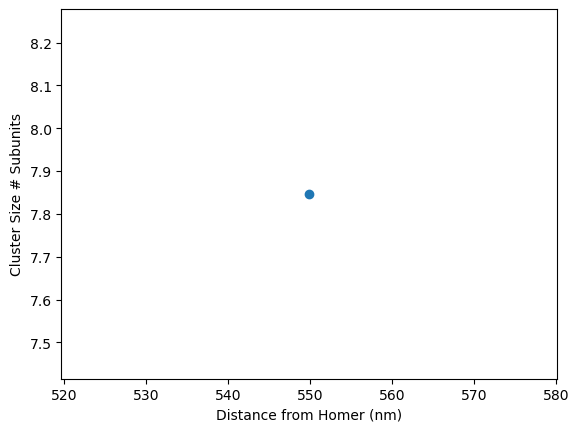

In [29]:
distances_to_homer = FOV_A.get_all_distances_to_homer(param, max_dark_time)
sizes = FOV_A.get_all_cluster_sizes(param, max_dark_time)

greatest_size = 10
distances_to_homer = [distances_to_homer[i] for i in range(len(distances_to_homer)) if sizes[i] < greatest_size]
sizes = [sizes[i] for i in range(len(sizes)) if sizes[i] < greatest_size]

window = 50
average_distances, average_sizes = moving_average(np.array(distances_to_homer), np.array(sizes), window)

plt.figure()
plt.scatter(distances_to_homer, sizes)
plt.plot(average_distances, average_sizes, color='r', linestyle='-', linewidth=2)  # Plot the moving average line
plt.ylabel("Cluster Size # Subunits")
plt.xlabel("Distance from Homer (nm)")
plt.show()

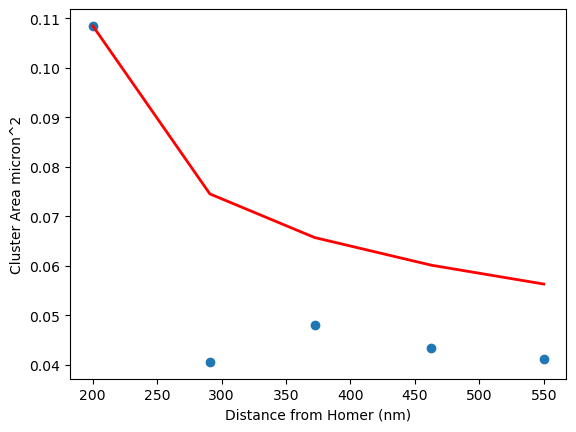

In [30]:
from matplotlib import pyplot as plt
distances_to_homer = FOV_A.get_all_distances_to_homer(param, max_dark_time)
areas = FOV_A.get_all_cluster_areas(param, max_dark_time)

greatest_area = 10
distances_to_homer = [distances_to_homer[i] for i in range(len(distances_to_homer)) if areas[i] < greatest_area]
areas = [areas[i] for i in range(len(areas)) if areas[i] < greatest_area]

window = 20
average_distances, average_areas = moving_average(np.array(distances_to_homer), np.array(areas), window)

plt.figure()
plt.scatter(distances_to_homer, areas)
plt.plot(average_distances, average_areas, color='r', linestyle='-', linewidth=2)  # Plot the moving average line
plt.ylabel("Cluster Area micron^2")
plt.xlabel("Distance from Homer (nm)")
plt.show()

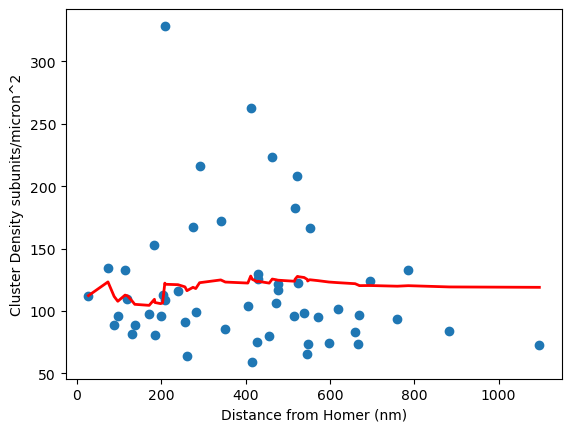

In [12]:
distances_to_homer = FOV_A.get_all_distances_to_homer(param, max_dark_time)
densities = FOV_A.get_all_cluster_densities(param, max_dark_time)

greatest_density = 1000
distances_to_homer = [distances_to_homer[i] for i in range(len(distances_to_homer)) if densities[i] < greatest_density]
densities = [densities[i] for i in range(len(densities)) if densities[i] < greatest_density]

window = 50
average_distances, average_densities = moving_average(np.array(distances_to_homer), np.array(densities), window)

plt.figure()
plt.scatter(distances_to_homer, densities)
plt.plot(average_distances, average_densities, color='r', linestyle='-', linewidth=2)  # Plot the moving average line
plt.ylabel("Cluster Density subunits/micron^2")
plt.xlabel("Distance from Homer (nm)")
plt.show()